# Fashion MNIST

Student name(s): Najmeh Mohajeri
Student id(s):2422386

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures


In [2]:
from sklearn.datasets import fetch_openml
x, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
print(x.shape, y.shape)

(70000, 784) (70000,)


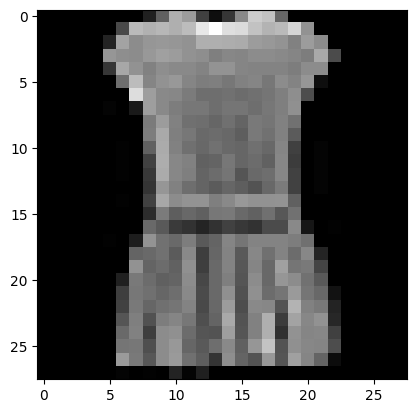

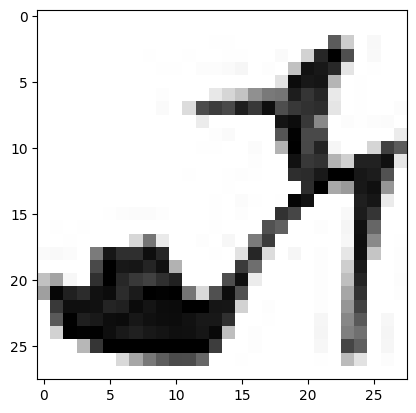

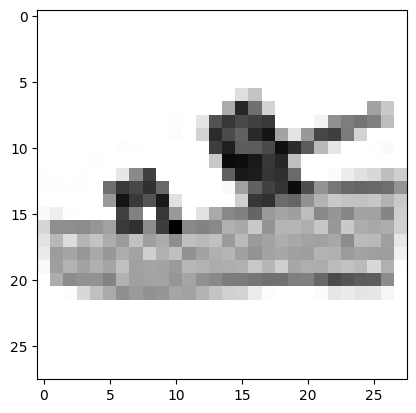

In [3]:
plt.imshow(x[3].reshape(28,28), cmap='gray')
plt.show()
plt.imshow(x[9].reshape(28,28), cmap='gray_r')
plt.show()
plt.imshow(x[12].reshape(28,28), cmap='gray_r')
plt.show()

In [3]:
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)


np.random.seed(42)
x_train_val, x_test, y_train_val, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)


x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Validation data shape: {x_val.shape}, Validation labels shape: {y_val.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (42000, 784), Training labels shape: (42000,)
Validation data shape: (14000, 784), Validation labels shape: (14000,)
Test data shape: (14000, 784), Test labels shape: (14000,)


In [ ]:
#x_train_grs, x_test_grs, y_train_grs, y_test_grs = train_test_split(x_train, y_train, test_size=0.8)
#print(x_train_grs.shape, y_train_grs.shape, x_test_grs.shape, y_test_grs.shape)

(7840, 784) (7840,) (31360, 784) (31360,)


In [5]:
from sklearn.model_selection import GridSearchCV
fashion_mnist_lrmodel =LogisticRegression()
parameters = {
     'C': [ 0.1 , 1 , 10 , 100],
     'penalty': ['l1','l2'],
     'solver': ['saga']
 }
logreg_cv = GridSearchCV(fashion_mnist_lrmodel, parameters,cv=2)
logreg_cv.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['saga']})

In [6]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
accuracy : 0.8518809523809524


In [4]:
fashion_mnist_lrmodel= LogisticRegression(penalty= 'l2', C=0.1, solver = 'saga').fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


training accuracy 0.8677380952380952
validation accuracy 0.8503571428571428


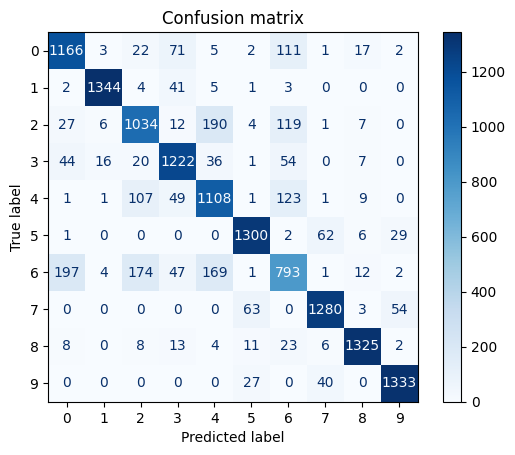

In [5]:
print("training accuracy", fashion_mnist_lrmodel.score(x_train, y_train))
print("validation accuracy", fashion_mnist_lrmodel.score(x_val, y_val))
disp = ConfusionMatrixDisplay.from_estimator(
    fashion_mnist_lrmodel,
    x_test,
    y_test,
    display_labels=fashion_mnist_lrmodel.classes_,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")

plt.show()

In [6]:
accu=[]
methods=[]
accu.append(fashion_mnist_lrmodel.score(x_test,y_test))
methods.append('logistic regression')

In [7]:
fashion_mnist_rfmodel = RandomForestClassifier().fit(x_train, y_train)

training accuracy 1.0
validation accuracy 0.8762142857142857


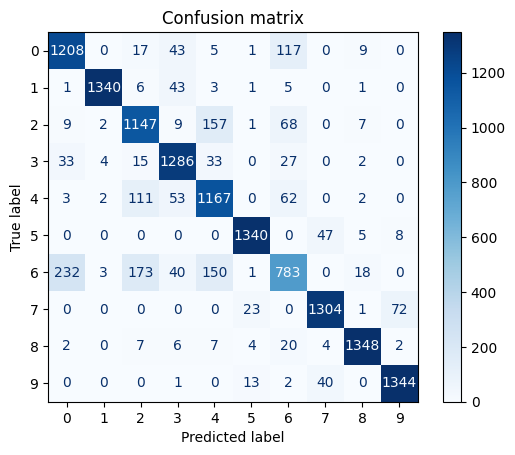

In [8]:
print("training accuracy", fashion_mnist_rfmodel.score(x_train, y_train))
print("validation accuracy", fashion_mnist_rfmodel.score(x_val, y_val))

disp = ConfusionMatrixDisplay.from_estimator(
    fashion_mnist_rfmodel,
    x_test,
    y_test,
    display_labels=fashion_mnist_rfmodel.classes_,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")

plt.show()

In [9]:
accu.append(fashion_mnist_rfmodel.score(x_test,y_test))
methods.append('random forest')

In [13]:
from sklearn.model_selection import GridSearchCV
fashion_mnist_svcmodel =SVC()
parameters = {
     'kernel': [ 'rbf'],
     'C': [0.1 ,1,10],
     'gamma': ['auto']
 }
svcmodel_cv = GridSearchCV(fashion_mnist_svcmodel, parameters,cv=2,n_jobs=4)
svcmodel_cv.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [15]:
print("tuned hpyerparameters :(best parameters) ",svcmodel_cv.best_params_)
print("accuracy :",svcmodel_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
accuracy : 0.8908333333333334


In [16]:
fashion_mnist_svcmodel = SVC(kernel='rbf',C=10,gamma='auto').fit(x_train, y_train)

training accuracy 0.9834761904761905
validation accuracy 0.8962857142857142


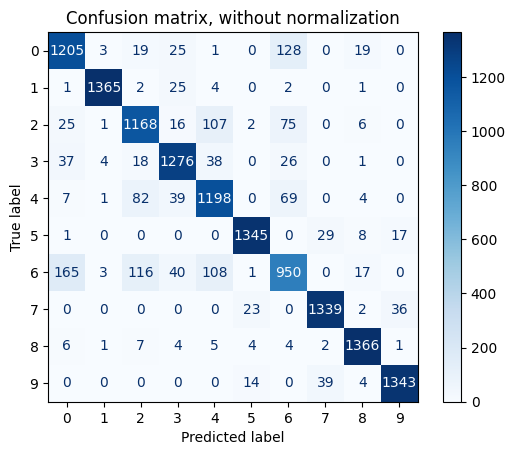

In [17]:
print("training accuracy", fashion_mnist_svcmodel.score(x_train, y_train))
print("validation accuracy", fashion_mnist_svcmodel.score(x_val, y_val))

disp = ConfusionMatrixDisplay.from_estimator(
    fashion_mnist_svcmodel,
    x_test,
    y_test,
    display_labels=fashion_mnist_svcmodel.classes_,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix, without normalization")

plt.show()

In [18]:
accu.append(fashion_mnist_svcmodel.score(x_test,y_test))
methods.append('Support Vector Machine')

[Text(0, 0, '0.85'), Text(0, 0, '0.88'), Text(0, 0, '0.90')]

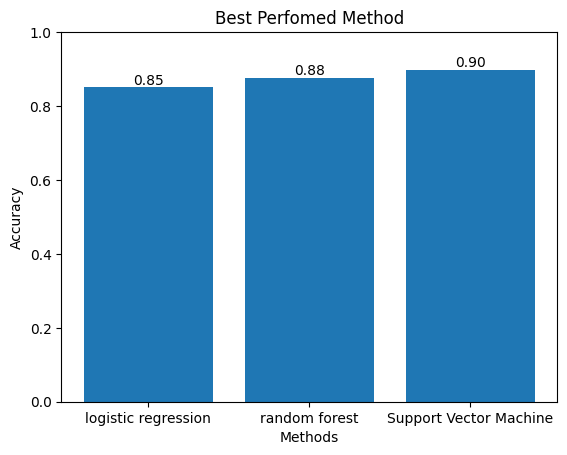

In [26]:
fig, ax = plt.subplots()
bar_container = ax.bar(methods, accu)
ax.set(ylabel='Accuracy', xlabel='Methods', title= 'Best Perfomed Method', ylim=(0,1))
ax.bar_label(bar_container, fmt='{:,.2f}')


Based on Zalando Search , the best result for SVC comes from a model with this parameters : {"C":10,"kernel":"poly"} , with the accuracy of 0.897. best result for RandomForest has parameters like :{"criterion":"entropy","max_depth":50,"n_estimators":100} with accuracy of 0.879. And Finally LigisticRegression with parameters {"C":1,"multi_class":"ovr","penalty":"l1"} and 0.842 accuracy.
My result shows better results.